In [1]:
# importación de las librerias y bibliotecas que serán utilizadas para el algoritmo de bosques aletorios
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Lectura del dataset ya analizado y con los cambios necesarios aplicados
df_new = pd.read_csv('df_clear.csv')

In [3]:
#Visualización del conjunto de datos
df_new

,Age,EstimatedSalary,Purchased,Gender_Male
0,19.0,19000.0,0,1
1,35.0,20000.0,0,1
2,26.0,43000.0,0,0
3,27.0,57000.0,0,0
4,19.0,76000.0,0,1
...,...,...,...,...
395,46.0,41000.0,1,0
396,51.0,23000.0,1,1
397,50.0,20000.0,1,0
398,36.0,33000.0,0,1


In [4]:
#División del dataset en conjunto de entramiento y prueba
from sklearn.model_selection import train_test_split
df_train, df_test, = train_test_split(df_new, test_size = 0.25, random_state=0)

In [5]:
#Verificación de las particiones realizadas
print("Longitud del Training Set:", len(df_train))
print("Longitud del Validation Set:", len(df_test))

Longitud del Training Set: 300
Longitud del Validation Set: 100


In [6]:
# Conjunto de datos de entrenamiento
X_train = df_train.drop("Purchased", axis=1)
y_train = df_train["Purchased"].copy()

In [7]:
# Conjunto de datos de validación
X_val = df_test.drop("Purchased", axis=1)
y_val = df_test["Purchased"].copy()

In [8]:
#Escalado de los datos del conjunto de entrenamiento 
scaler = RobustScaler()
X_train_scaled = scaler.fit_transform(X_train)

In [9]:
#Escalado de los datos del conjunto de prueba
scaler = RobustScaler()
X_val_scaled = scaler.fit_transform(X_val)

In [10]:
# Transformación a un DataFrame de Pandas
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns, index=X_train.index)
X_val_scaled = pd.DataFrame(X_val_scaled, columns=X_val.columns, index=X_val.index)

## Entrenar y evaluar utilizando bosques aleatorios

In [11]:
# Importación de la librería 
from sklearn.ensemble import RandomForestClassifier

#Creación del modelo
ranforest = RandomForestClassifier()
ranforest.fit(X_train_scaled, y_train)

RandomForestClassifier()

In [12]:
#Prediccion con el conjunto de pruebas
y_pred = ranforest.predict(X_val_scaled)

## Evaluación de los resultados del modelo

In [13]:
#Validación del accuracy
from sklearn.metrics import accuracy_score
print('Accuracy: {:.3f}'.format(accuracy_score(y_val, y_pred)))

Accuracy: 0.930


In [14]:
#Validación de la matriz de confusión
from sklearn.metrics import confusion_matrix
confusion_matrix(y_val, y_pred)

array([[64,  4],
       [ 3, 29]], dtype=int64)

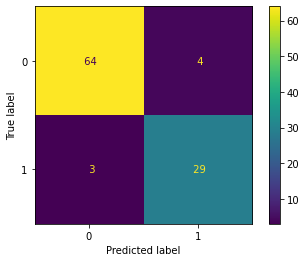

In [15]:
#Representación gráfica de los resultados de la matriz de confusión con el conjunto de pruebas
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(ranforest, X_val_scaled, y_val, values_format='3g')

In [16]:
#Descripción de los resultados de diferentes métricas de medición sobre el modelo entrenado y probado
from sklearn.metrics import confusion_matrix,classification_report,plot_confusion_matrix
print(confusion_matrix(y_val, y_pred))
print(classification_report(y_val, y_pred))

[[64  4]
 [ 3 29]]
              precision    recall  f1-score   support

           0       0.96      0.94      0.95        68
           1       0.88      0.91      0.89        32

    accuracy                           0.93       100
   macro avg       0.92      0.92      0.92       100
weighted avg       0.93      0.93      0.93       100

